In this notebook, I will predict the CTC  of Aplicant Using their Detail of Resume. I will use linear regression to train our Data. After it i will analys different regression model and compair to find best one .

# Import Important Library

In [1]:
import pandas as pd    # it will use to makeing DataFrame and get Data from Excel file
import numpy as np     # it will use to convert into numpy array
import matplotlib.pyplot as plt    # for ploting and visualising Data


# Import Train Dataset

Getting Data from "Data_file_xlsx" using Pandas syntax "read_excel".
here Data is a DataFrame format.

In [601]:
data = pd.read_excel("Data_file.xlsx")   

In [602]:
data.head(2)

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631


# Droping Index

In [603]:
data.drop(["S.No."],axis = 1,inplace = True)

In [604]:
data.head(2)

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631


# Checking Null Values

In [605]:
data.isnull().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

# Now change categorical variables to the numerical variables

In [606]:
data["City type"].unique()

array(['Non-Metro', 'Metro'], dtype=object)

In [607]:
data["Role"].unique()

array(['Manager', 'Executive'], dtype=object)

In [608]:
data["College"].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [609]:
data1 = data.copy()

In [610]:
data1["Role_manager"]= data1["Role"].apply(lambda x: 0 if x == "Executive" else x  )
data1["Role_manager"]= data1["Role_manager"].apply(lambda x: 1 if x == "Manager" else x  )

In [611]:
data1.head(2)

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Role_manager
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531,1
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631,0


In [612]:
data1["City_Metro"]= data1["City type"].apply(lambda x: 1 if x == "Metro" else x  )
data1["City_Metro"]= data1["City_Metro"].apply(lambda x: 0 if x == "Non-Metro" else x  )

In [613]:
data1

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Role_manager,City_Metro
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531,1,0
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631,0,1
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277,0,1
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880,0,1
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661,4,68,50,69712.403655,0,1
1334,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099,0,0
1335,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686,0,0
1336,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.382949,0,0


In [614]:
dummies = pd.get_dummies(data1.College)
dummies

,Tier 1,Tier 2,Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
1333,0,0,1
1334,1,0,0
1335,0,1,0
1336,1,0,0


In [615]:
dummies.drop(["Tier 3"],axis = 1 , inplace = True)
dummies

,Tier 1,Tier 2
0,1,0
1,0,1
2,0,1
3,0,0
4,0,0
...,...,...
1333,0,0
1334,1,0
1335,0,1
1336,1,0


In [616]:
data2 = pd.concat([data1,dummies],axis = 1)
data2

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Role_manager,City_Metro,Tier 1,Tier 2
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531,1,0,1,0
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631,0,1,0,1
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277,0,1,0,1
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880,0,1,0,0
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661,4,68,50,69712.403655,0,1,0,0
1334,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099,0,0,1,0
1335,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686,0,0,0,1
1336,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.382949,0,0,1,0


In [617]:
data3 = data2.drop(["College","Role","City type"],axis = 1)
data3

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Role_manager,City_Metro,Tier 1,Tier 2
0,55523,3,66,19,71406.576531,1,0,1,0
1,57081,1,84,18,68005.870631,0,1,0,1
2,60347,2,52,28,76764.020277,0,1,0,1
3,49010,2,81,33,82092.386880,0,1,0,0
4,57879,4,74,32,73878.097729,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,59661,4,68,50,69712.403655,0,1,0,0
1334,53714,1,67,18,69298.750099,0,0,1,0
1335,61957,1,47,18,66397.770686,0,0,0,1
1336,53203,3,69,21,64044.382949,0,0,1,0


# Data visualisation

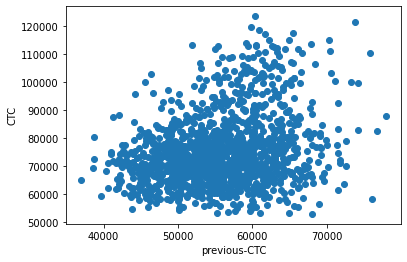

In [618]:
plt.scatter(data = data2 ,x = "Previous CTC",y="CTC")
plt.xlabel('previous-CTC')
plt.ylabel("CTC")
plt.show()

(array([333.,   0.,   0., 313.,   0.,   0., 348.,   0.,   0., 344.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

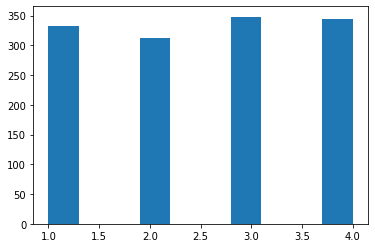

In [619]:
plt.hist(data = data2,x = "Previous job changes")

# Linear regression training

In [620]:
data3.head(4)

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Role_manager,City_Metro,Tier 1,Tier 2
0,55523,3,66,19,71406.576531,1,0,1,0
1,57081,1,84,18,68005.870631,0,1,0,1
2,60347,2,52,28,76764.020277,0,1,0,1
3,49010,2,81,33,82092.386880,0,1,0,0


In [621]:
x = data3.drop(["CTC"],axis = 1)
x.head(3)

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Role_manager,City_Metro,Tier 1,Tier 2
0,55523,3,66,19,1,0,1,0
1,57081,1,84,18,0,1,0,1
2,60347,2,52,28,0,1,0,1


In [622]:
y  = pd.DataFrame(data3.CTC)
y.head(3)

,CTC
0,71406.576531
1,68005.870631
2,76764.020277


In [623]:
from sklearn.model_selection import train_test_split
x_train,x_val , y_train , y_val  = train_test_split(x,y,random_state =10, test_size  = 0.1 )

In [624]:
x_train.head(3)

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Role_manager,City_Metro,Tier 1,Tier 2
811,63523,3,45,33,0,0,0,0
1208,48402,4,47,37,1,0,1,0
1333,59661,4,68,50,0,1,0,0


In [625]:
y_train.head(3)

,CTC
811,58048.117782
1208,81043.152546
1333,69712.403655


In [626]:
x_val.head(3)

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Role_manager,City_Metro,Tier 1,Tier 2
7,49944,2,56,37,0,0,0,0
999,53629,4,68,36,0,0,0,0
1209,58434,4,65,59,0,1,1,0


In [627]:
y_val.head(3)

,CTC
7,57768.435037
999,69648.896837
1209,70821.120760


# Apply LinearRegression,Lasso,Ridge And compair between them

In [628]:
from sklearn.linear_model import LinearRegression
model_linear =  LinearRegression()
model_linear.fit(x_train,y_train)


LinearRegression()

In [629]:
model_linear.score(x_val,y_val)

0.5839753563622806

In [630]:
from sklearn.linear_model import Lasso
model_Lasso = Lasso()
model_Lasso.fit(x,y)

Lasso()

In [631]:
model_Lasso.score(x_val,y_val)

0.5855115246608241

In [632]:
from sklearn.linear_model import Ridge
model_ridge  = Ridge()
model_ridge.fit(x , y)

Ridge()

In [633]:
model_ridge.score(x_val,y_val)

0.585617406631054

All The three give almost same level of accuracy

# Using Trained model on Test Data set

In [634]:
data_test = pd.read_excel("Test_data_file.xlsx")

In [635]:
data_test.head(3)

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [636]:
data_test.columns

Index(['College', 'Role', 'City type', 'College_T1', 'College_T2',
       'Role_Manager', 'City_Metro', 'previous CTC', 'previous job changes',
       'Graduation marks', 'Exp', 'Actual CTC', 'Predicted CTC', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [637]:
data_test1 = data_test.drop(['College', 'Role', 'City type', 'Predicted CTC', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23'],axis = 1)

In [638]:
data_test1

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,1,0,1,0,55523,3,66,19,71406.576531
1,0,1,0,1,57081,1,84,18,68005.870631
2,0,1,0,1,60347,2,52,28,76764.020277
3,0,0,0,1,49010,2,81,33,82092.386880
4,0,0,0,1,57879,4,74,32,73878.097729
...,...,...,...,...,...,...,...,...,...
1333,0,0,0,1,59661,4,68,50,69712.403655
1334,1,0,0,0,53714,1,67,18,69298.750099
1335,0,1,0,0,61957,1,47,18,66397.770686
1336,1,0,0,0,53203,3,69,21,64044.382949


# Renaming And Arranging Column Of Test Dataset

In [639]:
data_test1.columns

Index(['College_T1', 'College_T2', 'Role_Manager', 'City_Metro',
       'previous CTC', 'previous job changes', 'Graduation marks', 'Exp',
       'Actual CTC'],
      dtype='object')

In [640]:
data3.columns

Index(['Previous CTC', 'Previous job changes', 'Graduation marks',
       'Exp (Months)', 'CTC', 'Role_manager', 'City_Metro', 'Tier 1',
       'Tier 2'],
      dtype='object')

In [641]:
data_test2 = data_test1.rename(columns = {'College_T1':'Tier 1', 'College_T2':'Tier 2','Role_Manager':'Role_manager','previous CTC':'Previous CTC','previous job changes':'Previous job changes','Exp':'Exp (Months)','Actual CTC':'CTC'})

In [642]:
data_test2 = data_test2[['Previous CTC', 'Previous job changes', 'Graduation marks',
       'Exp (Months)', 'CTC', 'Role_manager', 'City_Metro', 'Tier 1',
       'Tier 2']]

In [643]:
data_test2.head(3)

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,Role_manager,City_Metro,Tier 1,Tier 2
0,55523,3,66,19,71406.576531,1,0,1,0
1,57081,1,84,18,68005.870631,0,1,0,1
2,60347,2,52,28,76764.020277,0,1,0,1


# Predict  Row wise to add ctc without disturbing excel file 

In [644]:
x_test = data_test2.drop(["CTC"],axis = 1)
y_test = data_test2["CTC"]
x_test


,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Role_manager,City_Metro,Tier 1,Tier 2
0,55523,3,66,19,1,0,1,0
1,57081,1,84,18,0,1,0,1
2,60347,2,52,28,0,1,0,1
3,49010,2,81,33,0,1,0,0
4,57879,4,74,32,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,59661,4,68,50,0,1,0,0
1334,53714,1,67,18,0,0,1,0
1335,61957,1,47,18,0,0,0,1
1336,53203,3,69,21,0,0,1,0


In [645]:
for index, row  in x_test.iterrows():

    da = pd.DataFrame(row)
    da1 = da.transpose()

    data_test.at[index , "Predicted CTC"] = model_linear.predict(da1)
    
    

In [646]:
data_test["Predicted CTC"]

0       86047.244106
1       65770.307256
2       69866.416660
3       66791.182965
4       70440.118595
            ...     
1333    75979.521403
1334    65676.745581
1335    63990.013491
1336    66062.228375
1337    90910.670527
Name: Predicted CTC, Length: 1338, dtype: float64

In [647]:
model_linear.score(x_test,y_test)

0.6081101404305128

# Export Csv File 

In [649]:
data_test.to_csv('file1.csv', index = False)
